In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import sys, os

mypath = os.getcwd() + '/ItemBandits'
if mypath not in sys.path:
    sys.path.append(mypath)
    
mypath = os.getcwd() + '/ItemBandits/abstract'
if mypath not in sys.path:
    sys.path.append(mypath)

In [18]:
from Analysis import Analysis
from RandomBandit import RandomBandit
from Exp3 import Exp3

an = Analysis()
lst = []

# Añadimos el algoritmo Random
bandit = RandomBandit()
bandit.read_csv('data/ratings.csv')
lst.append(bandit)

# Añadimos el algoritmo EXP3
bandit = Exp3()
bandit.read_csv('data/ratings.csv')
lst.append(bandit)

an.execute(lst,1e5)
an.recall()


[autoreload of abstract.Bandit failed: Traceback (most recent call last):
  File "C:\Users\David\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\David\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\David\anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\David\anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\David\Desktop\Universidad\TFGI\TFGReinforcementLearning/ItemBandits\abstract\Bandit.py", line 21, in <module>
    _ = get_ipython().__class__.__name__
NameError: name 'get_ipython' is not de

Ejecutando Random...









  0%|▏                                                                         | 195/100000.0 [00:00<01:42, 976.35it/s]






  0%|▏                                                                         | 294/100000.0 [00:00<01:41, 981.34it/s]






  0%|▎                                                                         | 393/100000.0 [00:00<01:41, 983.62it/s]






  1%|▎                                                                        | 505/100000.0 [00:00<01:36, 1031.38it/s]






  1%|▍                                                                        | 634/100000.0 [00:00<01:28, 1117.53it/s]






  1%|▌                                                                        | 754/100000.0 [00:00<01:26, 1143.35it/s]






  1%|▋                                                                        | 873/100000.0 [00:00<01:25, 1157.09it/s]






  1%|▋                                                                        | 989/100000.0 [00:00<01:29, 1103

 15%|██████████▊                                                            | 15149/100000.0 [00:11<01:07, 1252.90it/s]






 15%|██████████▊                                                            | 15291/100000.0 [00:11<01:05, 1285.62it/s]






 15%|██████████▉                                                            | 15424/100000.0 [00:12<01:05, 1297.29it/s]






 16%|███████████                                                            | 15554/100000.0 [00:12<01:09, 1213.40it/s]






 16%|███████████▏                                                           | 15677/100000.0 [00:12<01:09, 1205.68it/s]






 16%|███████████▏                                                           | 15808/100000.0 [00:12<01:09, 1212.71it/s]






 16%|███████████▎                                                           | 15951/100000.0 [00:12<01:07, 1241.74it/s]






 16%|███████████▍                                                           | 16097/100000.0 [00:12<01:05, 1280.42it/s

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

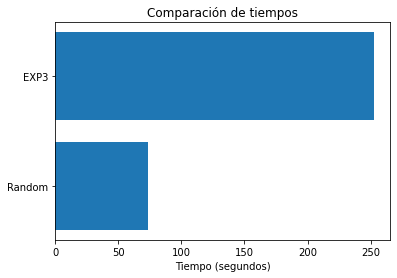

In [17]:
an.time()

[127.8496027   0.          0.       ]


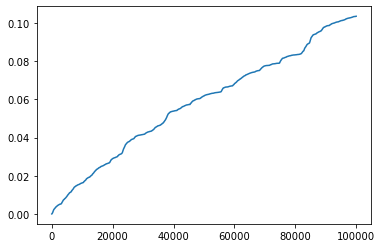

In [4]:
from EpsilonGreedy import EpsilonGreedy

bandit = EpsilonGreedy(epsilon=0.1,alpha=0.1)
bandit.read_csv('ratings.csv')
eps = bandit.run_epoch(epochs=100000)
bandit.plot_results()

[251.81503844   0.           0.        ]


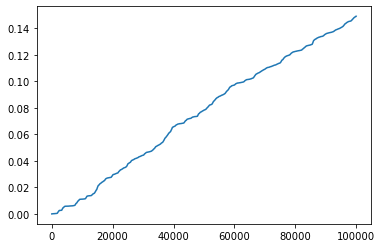

In [3]:
from ThompsonSampling import ThompsonSampling

bandit = ThompsonSampling('ratings.csv',beta=100)
thomps = bandit.run_epoch(epochs=100000)
bandit.plot_results()

In [5]:
from UCB import UCB

bandit = UCB('ratings.csv',c=0.1)
ucb = bandit.run_epoch(epochs=100000)
bandit.plot_results()

[288.86919498   0.           0.        ]


[158.40822434   0.           0.        ]


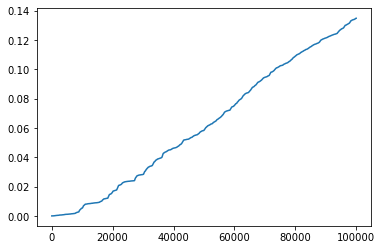

In [3]:
from GradientBandit import GradientBandit

bandit = GradientBandit(alpha=1)
bandit.read_csv('ratings.csv')
grad = bandit.run_epoch(epochs=100000)
bandit.plot_results()

[161.39579225   0.           0.        ]


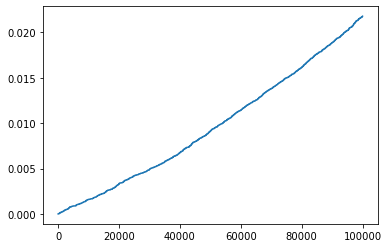

In [38]:
from Exp3 import Exp3

# Versión 1
bandit = Exp3()
bandit.read_csv('data/ratings.csv')
exp3 = bandit.run_epoch(epochs=100000)
bandit.plot_results()

[170.0817287   0.          0.       ]


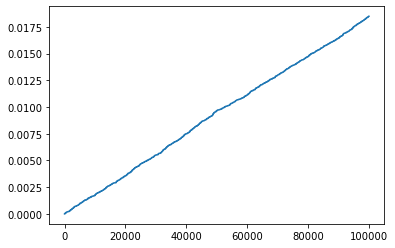

In [5]:
from Exp3 import Exp3

# Versión 2
bandit = Exp3()
bandit.read_csv('data/ratings.csv')
exp3 = bandit.run_epoch(epochs=100000)
bandit.plot_results()

[108.69751883   0.           0.        ]


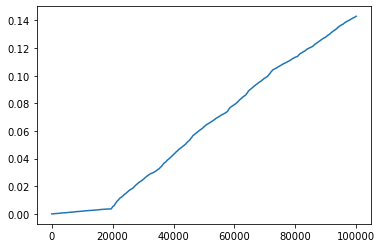

In [13]:
from CNAME import CNAME

bandit = CNAME()
bandit.read_csv('ratings.csv')
cname = bandit.run_epoch(epochs=100000)
bandit.plot_results()

[]

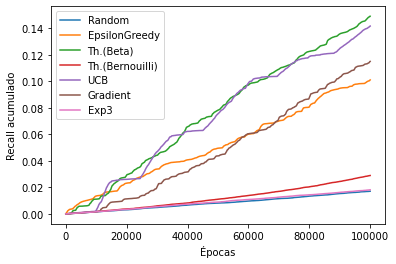

In [5]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Carga datos en el pickle
# graficas = [rnd,eps,thomps,ber,ucb,grad]
# with open('results.pkl', 'wb') as f:
#     pickle.dump(graficas, f)

# Descarga datos del pickle
with open('results.pkl', 'rb') as f:
    graficas = pickle.load(f)
    
labels = ['Random','EpsilonGreedy','Th.(Beta)','Th.(Bernouilli)','UCB','Gradient','Exp3']

for i,graf in enumerate(graficas):
    plt.plot(graf[0],np.array(graf[1]),label=labels[i])

plt.xlabel('Épocas')
plt.ylabel('Recall acumulado')

plt.legend()
plt.plot()